In [3]:
import re
import urllib
import requests
from bs4 import BeautifulSoup

# 웹 개발 언어

데이터 수집을 할 때 웹 개발 언어를 알아야 하는 이유는 웹 페이지에서 데이터를 가져오기 위해서입니다.

예를 들어, 어느 날 친구가 당신에게 "너는 컴퓨터가 얼마나 똑똑한지 알아?"라고 물어봤다고 생각해보세요. 당신은 궁금해졌고, 컴퓨터가 얼마나 똑똑한지 알아보기로 했습니다. 그래서 당신은 인터넷 검색을 통해 컴퓨터의 지능에 대한 정보를 찾아보기로 했습니다.

하지만 인터넷에는 수많은 정보가 있습니다. 모든 정보를 일일이 읽어보기에는 시간이 너무 오래 걸리죠. 이때 웹 개발 언어를 이해하고 파이썬 라이브러리를 사용하면 웹 페이지에서 필요한 정보만을 자동으로 추출할 수 있습니다.

## HTML, CSS, Javascript는 웹 개발에 사용되는 세 가지 주요 언어입니다.

- HTML은 HyperText Markup Language의 약자로 웹 페이지의 구조를 만들기 위한 언어입니다. HTML은 웹 페이지의 내용과 구조를 정의하는 데 사용됩니다.

- CSS는 Cascading Style Sheets의 약자로 웹 페이지의 디자인과 레이아웃을 만들기 위한 스타일시트입니다. CSS는 HTML로 작성된 웹 페이지의 외형을 예쁘게 바꿀 수 있습니다. 글자 색상과 배경 색상, 배치 등을 자유롭게 변경할 수 있습니다.

- Javascript는 웹 페이지를 프로그래밍하기 위한 언어입니다. Javascript를 사용하면 웹 페이지에 동적인 기능을 추가할 수 있습니다.

#### HTML의 구조  및 태그
- 구조
 - \<!Doctype html> : HTML5 문서를 선언하는 구문
 - \<html></html> : HTML 문서의 시작과 끝
 - \<head></head> : CSS, JavaScript, meta, title 정보들을 설정
 - \<body></body> : 실제 홈페이지 화면을 나타내는 부분

- 요소 구조
 - HTML 요소는 여러 속성들을 가질 수 있으며 속성들은 해당 요소에 대한 추가 정보를 제공
 - 시작 태그\(< >)로 시작해서 종료 태그(</>)로 끝남
 - 요소 안에 다른 요소를 작성할 수 있음 

<img src = "html요소구조.jpg" STYLE = "width : 500px;">

In [2]:
# HTML 기본 구조
html ='''
<!DOCTYPE html>                html5 명시
<html lang="en">               html 태그로 모든 태그를 감사줌. lang이라는 속성을 포함
 <head>                        head 태그는 meta, title 이외의 style, script, link와 같은 태그 포함
     <meta charset="UTF-8">    
     <title>a.html</title>      title 태그는 문서의 제목
     <meta name="viewport" content="width=device-width, initial-scale=1.0"> meta 태그는 name과 contents속성으로 문서 정보 포함
 </head>
 <body>                        웹페이지의 내용 포함
     <style type="text/css">    CSS 코드가 포함된는 태그  
     </style>
                                script 태그는 JavaScript 코드를 작성하거나 파일 로드. head 태그 or body 태그 하단 위치
 </body>
</html>
'''
print(f'HTML 구조 \n {html}')

HTML 구조 
 
<!DOCTYPE html>                html5 명시
<html lang="en">               html 태그로 모든 태그를 감사줌. lang이라는 속성을 포함
 <head>                        head 태그는 meta, title 이외의 style, script, link와 같은 태그 포함
     <meta charset="UTF-8">    
     <title>a.html</title>      title 태그는 문서의 제목
     <meta name="viewport" content="width=device-width, initial-scale=1.0"> meta 태그는 name과 contents속성으로 문서 정보 포함
 </head>
 <body>                        웹페이지의 내용 포함
     <style type="text/css">    CSS 코드가 포함된는 태그  
     </style>
                                script 태그는 JavaScript 코드를 작성하거나 파일 로드. head 태그 or body 태그 하단 위치
 </body>
</html>



#### HTML 태그
- p 태그를 이용하여 문단 작성
- h 태그를 이용하여 폰트 크기 설정
- ul(unordered list)과 ol(ordered list) 태그로 리스트 작성, 리스트 각각의 요소는 li(항목 나열) 태그로 표시  
- table 태그는 thead, tbody를 가질 수 있으며 표를 표현 : tr 행, th(가운데 정렬,굵은 글씨체),td 각 행의 컬럼
- input 태그와 button 태그 : 데이터를 넣는 폼과 페이지 조작 버튼 생성
- select # select 태그로 선택 리스트 생성
- a 태그로 다른 페이지로 이동. 상대경로(내가 있는 경로부터의 경로), 절대경로(항상 같은 url)
- img 태그로 이미지 포함 : src(이미지 붙임), alt(이미지 대체)
- span 태그로 p태그 처럼 글을 추가. span 태그는 옆으로 나열. br 태그 사용하여 p 태그처럼 사용
- div 태그는 화면 레이아웃을 잡는 역할 : 하위 태그들의 영역을 잡아줌

#### CSS 
- CSS로 웹 사이트를 꾸며주기 위해 해당 태그에 접근하는 방식을 크롤러에서도 사용.
- selector : CSS로 꾸미기 위해 특정 요소에 접근하는 것을 셀렉터라고 함.
  - html 파일을 만들었다면 각각의 태그에 다르게 css 를 설정 할 것입니다. 이 때, 어느 요소에 스타일을 적용할지 알려주는 방식이 바로 css 선택자 입니다.
- 태그를 이용하여 접근하면 태그는 전부 CSS 효과가 적용
- class를 이용하면 원하는 요소만 CSS 효과 적용할 수 있고 원하는 요소만 수집할 수 있음.
- id는 class와 다르게 id값이 고유해야 함(id는 한페이지에 하나만 존재해야 함)
- 부모 태그와 자식 태그를 나열하여 복잡한 셀렉터를 생성

CSS 선택자 이해

- https://ssungkang.tistory.com/entry/css-css-%EC%84%A0%ED%83%9D%EC%9E%90selector-%EC%9D%98-%EC%A2%85%EB%A5%98%EC%99%80-%EC%98%88%EC%8B%9C
- https://developer.mozilla.org/en-US/docs/Web/CSS/CSS_Selectors
- https://www.nextree.co.kr/p8468/

In [3]:
css = """

- 우리가 html 파일을 만들었다면 각각의 태그에 다르게 css 를 설정 할 것입니다. 
  이 때, 어느 요소에 스타일을 적용할지 알려주는 방식이 바로 css 선택자 입니다.

- 선택자가 어떻게 쓰이는가?

div {
    color: black;
    background-color: yellow;
}
div 태그들에게 css 를 주기 위해서 div 라는 선택자를 사용하였습니다. 이렇게 되면 html 문서에 
모든 div 태그들에는 { } 안에 적용해준 css 속성값들이 적용이 됩니다. div 처럼 태그의 이름 말고도 
선택자를 주는 방식이 굉장히 다양함

선택자의 종류

[ 선택자를 하나만 쓸 경우 ]

전체 선택자
전체 선택자는 * 을 사용하여 나타냅니다.

html 의 모든 태그에 대하여 적용합니다.

* {
    margin: 0 auto;
} 

태그 선택자
태그 선택자는 태그의 이름 을 사용하여 나타냅니다.
태그명이 선택자와 같은 태그들에 대하여 적용합니다.

p {
    color: red;
} 

클래스 선택자
클래스 선택자는 .클래스이름 을 사용하여 나타냅니다.
클래스가 클래스이름과 같은 태그들에 대하여 적용합니다.

.ClassName {
    width: 100px;
} 

ID 선택자
ID 선택자는 #아이디이름 을 사용하여 나타냅니다.
ID가 ID 이름과 같은 태그에 대해서 적용합니다.

#IdName {
    position: fixed;
} 

[ 선택자를 여러 개 쓸 경우] 

선택자를 여러 개 쓰는 경우를 복합 선택자라고 합니다. 복합 선택자에도 여러 가지 종류가 있어 
이에 대해서 알아보겠습니다.

하위 선택자
하위 선택자는 선택자 사이를 공백을 사용하여 나타냅니다.

앞 요소의 자손인 뒷 요소를 선택합니다.

section ul {
    text-shadow: none;
}
자식 선택자

하위 선택자는 선택자 사이를 > 를 사용하여 나타냅니다.

앞 요소의 자식 인 뒷 요소를 선택합니다.

section > ul {
    text-shadow: none;
}

자손과 자식의 차이는 무엇일까요?
자손은 자식을 포괄하는 의미입니다.
자손은 모든 하위 요소를 의미하고 자식은 바로 아래의 자식 요소에만 적용합니다.

인접 형제 선택자
인접 형제 선택자는 선택자 사이를 + 를 사용하여 나타냅니다.

앞 요소 바로 뒤의 뒷 요소를 선택합니다.

h1 + ul {
    color: red;
} 

일반 형제 선택자
일반 형제 선택자는 선택자 사이에 ~ 를 사용하여 나타냅니다.

앞 요소 뒤에 있는 모든 뒷 요소를 선택합니다.

h1 ~ ul {
    color: red;
}

형제라는 건 무엇일까요?

같은 부모를 가지는 요소들을 형제 라고 합니다.

속성 선택자
속성 선택자는 각 태그가 가지고 있는 그 속성에 접근하는 방식입니다. 생각 외로 활용도가 높으며 
크롤링를 할 경우에도 적절한 id 와 class 이름이 없을 경우, 이용합니다.

태그[속성]
속성이름 에 해당되는 속성을 가진 태그를 선택합니다.

a[href] {
    font-size: 10px;
}
태그[속성="변수"]
속성 의 속성값이 변수 인 태그를 선택합니다.

a[href="http://www.naver.com"] {
    color: black;
}

태그[속성~="변수"]
속성 의 속성값이 변수 를 포함하는 태그를 선택합니다.

a[href~="naver"] {
    color: black;
}

태그[속성^="변수"]
속성 의 속성값이 변수 로 시작하는 태그를 선택합니다.

a[href^="http"] {
    color: black;
}

태그[속성$="변수"]
속성 의 속성값이 변수 로 끝나는 요소를 선택합니다.

a[href$="com"]{
    color: black;
}

태그[속성*="변수"]
속성 의 속성값이 변수 를 포함하는 태그를 선택합니다.

a[href*="naver"] {
    color: black;
}

태그[속성~="변수"] 와 태그[속성*="변수"] 의 차이는 무엇일까요?
~ 은 포함여부를 단어를 기준으로 판단하고 * 는 문자열 기준으로 판단합니다.

다음과 같은 상황에서 navers 는 어떻게 될까요?
~ 은 naver와 navers 는 단어가 다르기 때문에 선택을 못하고
* 은 navers 는 naver 라는 문자열을 포함하기 때문에 선택을 하게 됩니다.

태그[속성|="변수"]
속성 의 속성값이 변수 이거나 변수 로 시작하는 태그를 선택합니다.

a[href|="http"]{
    color: black;
}
"""
print(f'CSS 선택자 \n {css}')

CSS 선택자 
 

- 우리가 html 파일을 만들었다면 각각의 태그에 다르게 css 를 설정 할 것입니다. 
  이 때, 어느 요소에 스타일을 적용할지 알려주는 방식이 바로 css 선택자 입니다.

- 선택자가 어떻게 쓰이는가?

div {
    color: black;
    background-color: yellow;
}
div 태그들에게 css 를 주기 위해서 div 라는 선택자를 사용하였습니다. 이렇게 되면 html 문서에 
모든 div 태그들에는 { } 안에 적용해준 css 속성값들이 적용이 됩니다. div 처럼 태그의 이름 말고도 
선택자를 주는 방식이 굉장히 다양함

선택자의 종류

[ 선택자를 하나만 쓸 경우 ]

전체 선택자
전체 선택자는 * 을 사용하여 나타냅니다.

html 의 모든 태그에 대하여 적용합니다.

* {
    margin: 0 auto;
} 

태그 선택자
태그 선택자는 태그의 이름 을 사용하여 나타냅니다.
태그명이 선택자와 같은 태그들에 대하여 적용합니다.

p {
    color: red;
} 

클래스 선택자
클래스 선택자는 .클래스이름 을 사용하여 나타냅니다.
클래스가 클래스이름과 같은 태그들에 대하여 적용합니다.

.ClassName {
    width: 100px;
} 

ID 선택자
ID 선택자는 #아이디이름 을 사용하여 나타냅니다.
ID가 ID 이름과 같은 태그에 대해서 적용합니다.

#IdName {
    position: fixed;
} 

[ 선택자를 여러 개 쓸 경우] 

선택자를 여러 개 쓰는 경우를 복합 선택자라고 합니다. 복합 선택자에도 여러 가지 종류가 있어 
이에 대해서 알아보겠습니다.

하위 선택자
하위 선택자는 선택자 사이를 공백을 사용하여 나타냅니다.

앞 요소의 자손인 뒷 요소를 선택합니다.

section ul {
    text-shadow: none;
}
자식 선택자

하위 선택자는 선택자 사이를 > 를 사용하여 나타냅니다.

앞 요소의 자식 인 뒷 요소를 선택합니다.


#### JavaScript
- 웹 사이트의 기능을 넣어줌. script 태그를 이용하여 작성. head or body 하단에 위치
- js를 이용하여 HTML 코드를 생성. 크롤러로 분석하기 가장 어려운 부분임
- DOM(Document Object Model)이란 HTML을 시각적으로 쉽게 표현하기 위해 만든 객체로 크롤러 만들 때 중요
- 데이터를 수집하기 위해 DOM을 이용해 데이터에 접근한 후 해당 데이터 수집
- 웹 브라우저는 HTML 코드를 가져온 후 JavaScript를 실행시킨 결과를 보여줌
- 소스 보기 페이지에 수집하고자 하는 요소가 없다면 네트워크 탭을 이용, 서버에서 데이터를 받아오는 지 확인
- 그렇지 않은 경우 셀레니움을 사용하여 해결

http://www.tcpschool.com/javascript/js_intro_basic

In [4]:
#!pip list

# 데이터 수집용 라이브러리


파이썬 데이터 수집용 라이브러리는 크게 두가지로 분류할 수 있습니다.

1. 파이썬 표준 라이브러리 모듈: 파이썬에서 기본적으로 제공되는 라이브러리 모듈로, urllib, xml, html.parser, json 등이 이에 해당합니다.

2. 외부 라이브러리 모듈: 다른 개발자가 만들어 공개한 라이브러리 모듈로, requests, BeautifulSoup, Scrapy, Selenium 등이 이에 해당합니다.


이러한 라이브러리 모듈들을 활용하면 데이터 수집과 가공을 빠르고 쉽게 수행할 수 있습니다.

requests 모듈 : pip install requests 명령어로 설치, anaconda를 설치하면 기본 설치
- http는 요청과 응답으로 이루어져 있음
- 요청/응답 구조
 - 요청
      * GET : 정보를 가져오기 위해 요청
      * POST: 새로운 정보를 보내기 위해 요청
      * PUT: 수정할 정보를 보내기 위해 요청
      * DELETE: 정보를 삭제하기 위해 요청
 - 응답
      * 1XX: 요청을 받았고 작업 진행 중
      * 2XX: 사용자의 요청이 성공적으로 수행 됨
      * 3XX: 요청은 완료되었으나 리다이렉션이 필요
      * 4XX: 사용자의 요청이 잘못됨
      * 5XX: 서버에 오류가 발생함
- import requests로 모듈 호출 후 사용

- BeautifulSoup 모듈: HTML, XML 문서를 파싱하는 데 사용되는 라이브러리입니다.
- Scrapy 모듈: 웹 크롤링을 위해 만들어진 라이브러리로, 대규모 웹사이트에서 데이터 수집을 효과적으로 수행할 수 있습니다.
- Requests 모듈: HTTP 요청을 보내고 받는 데 사용되는 라이브러리입니다. REST API를 사용할 때 자주 사용됩니다.
- Selenium 모듈: 웹 브라우저를 제어하여 데이터를 수집하는 데 사용됩니다. 특히 동적인 웹사이트에서 데이터를 수집할 때 유용합니다.

### urllib

urllib 모듈이란: 파이썬의 표준 모듈로써 URL을 다루기 위한 모듈 패키지
- 설치가 필요하지 않고 import urllib로 활용
- requests 모듈과 마찬가지로 URL과 관련된 여러가지 기능들을 제공

하위모듈
- request : URL을 열고 읽는 모듈(HTTP 요청)
- error : request 모듈에서 발생하는 에러들을 포함하는 모듈
- parse : URL을 파싱하는 모듈(URL 해석 및 조작)
- robots.txt 파일을 파싱하는 모듈

In [5]:
URL = "https://www.naver.com/"
response = requests.get(URL)
#html_data = response.text
#html_data

print(response)

<Response [200]>


In [6]:
request = urllib.request.Request(URL)
print(request)
print(request.full_url)
print(request.type)
print(request.host)

https://www.naver.com/
https
www.naver.com


In [7]:
# urlopen() : 해당 url을 열기, 응답 데이터는 바이트 형식의 HTTPResponse객체

request1 = urllib.request.urlopen(request)
request2 = urllib.request.urlopen(URL)
print(request1)
print(request2)

In [8]:
print(request2.read(500).decode('utf-8'))


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <m


In [9]:
print(request2.getheaders(),"\n")
print(request2.geturl(),"\n")

[('Server', 'NWS'), ('Date', 'Fri, 28 Apr 2023 01:06:12 GMT'), ('Content-Type', 'text/html; charset=UTF-8'), ('Transfer-Encoding', 'chunked'), ('Connection', 'close'), ('Set-Cookie', 'PM_CK_loc=9643ff7596a688874527662c82394c2e87c49b96b2898c30010b82944d11d171; Expires=Sat, 29 Apr 2023 01:06:12 GMT; Path=/; HttpOnly'), ('Cache-Control', 'no-cache, no-store, must-revalidate'), ('Pragma', 'no-cache'), ('P3P', 'CP="CAO DSP CURa ADMa TAIa PSAa OUR LAW STP PHY ONL UNI PUR FIN COM NAV INT DEM STA PRE"'), ('X-Frame-Options', 'DENY'), ('X-XSS-Protection', '1; mode=block'), ('Strict-Transport-Security', 'max-age=63072000; includeSubdomains'), ('Referrer-Policy', 'unsafe-url')] 

https://www.naver.com/ 



In [10]:
response = urllib.request.urlopen(URL)
byte_data = response.read(500)
print(byte_data)
text_data = byte_data.decode("utf-8")
print(text_data)

b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <m'

<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple

In [11]:
# urllib.request.urlretrieve() : 웹 상의 이미지를 저장
img_src = 'https://homepages.cae.wisc.edu/~ece533/images/tulips.png'
new_name = "img.png"
urllib.request.urlretrieve(img_src, new_name)

('img.png', <http.client.HTTPMessage at 0x13d8660e670>)

In [12]:
# 단순한 패턴을 읽을 때에는 복잡한 정규표현식보다는 간단한 parse 모듈을 사용
# parsing : 문자열이나 파일 등의 입력을 받아서 그것을 더 작은 단위로 쪼개고 분석하여 그 구조를 파악하는 과정
URL = "https://section.blog.naver.com/Search/Post.naver?pageNo=1&rangeType=ALL&orderBy=sim&keyword=ai"

parse = urllib.parse.urlparse(URL)
print(parse)

ParseResult(scheme='https', netloc='section.blog.naver.com', path='/Search/Post.naver', params='', query='pageNo=1&rangeType=ALL&orderBy=sim&keyword=ai', fragment='')


In [13]:
print(parse[0])

https


In [14]:
# urllib.parse.urlsplit() : url을 5개로 분리하여 변환
URL = 'https://blog.naver.com/koreatech91;a=1?b=2#b'

parse1 = urllib.parse.urlparse(URL)
parse2 = urllib.parse.urlsplit(URL)

print(parse1)
print(parse2)

ParseResult(scheme='https', netloc='blog.naver.com', path='/koreatech91', params='a=1', query='b=2', fragment='b')
SplitResult(scheme='https', netloc='blog.naver.com', path='/koreatech91;a=1', query='b=2', fragment='b')


In [15]:
# urllib.parse.urlunparse(), urllib.parse.urlunsplit()
# 분리된 url을 다시 합침. 튜플로 반환되기 때문에 리스트로 변경하여 활용
URL = 'https://blog.naver.com/koreatech91;a=1?b=2#b'

parse1 = urllib.parse.urlparse(URL)
print(parse1)

parse1 = list(parse1)
parse1[1] = "blog.daum.net"

unparse1 = urllib.parse.urlunparse(parse1)
print(unparse1)

ParseResult(scheme='https', netloc='blog.naver.com', path='/koreatech91', params='a=1', query='b=2', fragment='b')
https://blog.daum.net/koreatech91;a=1?b=2#b


In [16]:
# urljoin(a,b) : a와 b URL을 합쳐주는 기능. "/"에 따라 URL 주소가 달라짐
url = "https://naver.com/a/b"
print(urllib.parse.urljoin(url,"c"))
print(urllib.parse.urljoin(url, "/c"))

https://naver.com/a/c
https://naver.com/c


In [17]:
URL = 'https://search.naver.com/search.naver?query="파이썬"'
req = requests.get(URL)
soup = BeautifulSoup(req.text, "html.parser")
soup = str(soup)
item = re.findall("[가-힣]+", soup)
m = " ".join(item)
m

'파이썬 네이버 통합검색 파이썬 의 네이버 통합검색 결과입니다 파이썬 의 네이버 통합검색 결과입니다 파이썬 네이버 통합검색 파이썬 파이썬 메뉴 영역으로 바로가기 본문 영역으로 바로가기 검색 검색어를 입력해 주세요 파이썬 파이썬 한글 입력기 네트워크 상태가 안 좋아 한영입력기를 불러오지 못했습니다 잠시 후 다시 시도해 주세요 자동완성 레이어 최근검색어 전체삭제 삭제 검색어 저장 기능이 꺼져 있습니다 설정이 초기화 된다면 도움말 을 확인해주세요 최근 검색어 내역이 없습니다 설정이 초기화 된다면 도움말 을 확인해주세요 도움말 자동저장 끄기 회 로또당첨번호 동행복권 제공 원 바로가기 추가 추가 추가 자세히보기 관심사를 반영한 컨텍스트 자동완성 도움말 컨텍스트 자동완성 컨텍스트 자동완성 설정은 해당기기 브라우저 에 저장됩니다 자세히 동일한 시간대 연령 남녀별 사용자 그룹의 관심사에 맞춰 자동완성을 제공합니다 로그인 자세히 컨텍스트 자동완성 레이어 닫기 도움말 신고 자동완성 끄기 검색 찌꺼기 제거 대응 통합 이미지 지식 인플루언서 동영상 쇼핑 뉴스 어학사전 지도 더보기 도서 뮤직 지식백과 오디오클립 학술정보 검색옵션 통합검색 공유 통합검색 파이썬 통합검색 결과 파이썬 검색옵션 닫기 정렬 관련도순 최신순 기간 전체 시간 일 주 개월 개월 개월 년 직접입력 옵션 펼치기 접기 기간 설정시작 기간 설정끝 년 월 일 적용 옵션초기화 검색옵션 가이드 의 경로 지정 은 의 별로 호출해야함 클릭로그 호출 파이썬 이 정확하게 일치한 상세검색 결과입니다 일반검색 결과보기 문서 저장하기 에 저장 바로가기 번역보기 관련문서 더보기 전체 블로그 카페 뷰타입 필터를 선택하세요 기본뷰 타임라인뷰 멀티미디어뷰 문서 저장하기 에 저장 바로가기 슈퍼더블디 파이썬 자격증 취득 독학보다 학원이 좋은 이유 그래서 처음으로 코딩을 배워보기 위해 파이썬 자격증을 취득하게 되었습니다 파이썬 자격증을 가장 먼저 취득한 이유는 기초코딩 중에서 가장 배우기 쉽다고 해서 취득하게 되었는데요 기초코딩에는 언어와 자바 그리

In [18]:
# quote(), unquote() : 퍼센트 인코딩으로 변환
# 퍼센트 인코딩(percent-encoding)은 URL에 문자를 표현하는 문자 인코딩 방법
# url에 한글이 섞이면 오류가 발생하기 때문
print(urllib.parse.quote("파이썬"))
print(urllib.parse.unquote("%ED%8C%8C%EC%9D%B4%EC%8D%AC"))

URL = "https://search.naver.com/search.naver?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC"
print(urllib.parse.unquote(URL))

%ED%8C%8C%EC%9D%B4%EC%8D%AC
파이썬
https://search.naver.com/search.naver?query=파이썬


In [19]:
URL = "https://search.naver.com/search.naver?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC"
response = urllib.request.urlopen(URL)

byte_data = response.read()
text_data = byte_data.decode("utf-8")
print(text_data)

<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="파이썬 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'파이썬'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'파이썬'의 네이버 통합검색 결과입니다."> <title>파이썬 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230427.css"> <link rel="stylesheet" type="text/css" href="http

In [20]:
# 홈페이지를 로컬에 파일로 저장
request = urllib.request.Request("http://www.naver.com")
data = urllib.request.urlopen(request).read()
f = open("pc.html", "wb")
f.write(data)
f.close()


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
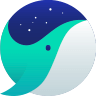
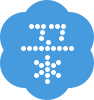

In [21]:
with open("pc.html", "rb") as f:
    data = f.read().decode("utf-8")
    print(data)

### 과제4_0426
네이버 사이트에서 아래 query_list를 검색할 수 있는 url을 생성하시오. (퍼센트 인코딩 변환)

query_list = ["파이썬", "웹 크롤링", "빅데이터", "python"]'

https://search.naver.com./search.naver?query=

In [22]:
query_list = ["파이썬", "웹 크롤링", "빅데이터", "python"]
URL = "https://search.naver.com./search.naver?query="
url_list = []

for i in query_list:
    a = urllib.parse.quote(i)
    url_list.append(URL+a)
    
url_list

['https://search.naver.com./search.naver?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC',
 'https://search.naver.com./search.naver?query=%EC%9B%B9%20%ED%81%AC%EB%A1%A4%EB%A7%81',
 'https://search.naver.com./search.naver?query=%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0',
 'https://search.naver.com./search.naver?query=python']

In [23]:
# json 형식의 데이터 가져오기
response = requests.get("https://raw.githubusercontent.com/naver/naver-openapi-guide/draft/naver-openapi-swagger.json")
result = response.json()
result

{'swagger': '2.0',
 'info': {'description': 'Naver Open API - Restful spec. You can find out more about Naver Open API at [https://developers.naver.com](https://developers.naver.com)',
  'version': '1.2.0',
  'title': 'Naver Open API',
  'termsOfService': 'https://developers.naver.com/products/terms'},
 'host': 'openapi.naver.com',
 'basePath': '/',
 'tags': [{'name': 'Clova',
   'description': 'Naver A.I platform and APIs',
   'externalDocs': {'description': 'Find out more',
    'url': 'https://developers.naver.com/products/clova/cic'}},
  {'name': 'Papago', 'description': 'Naver Machine Learning Translation APIs'},
  {'name': 'Naver Login', 'description': 'Login with Naver Id'},
  {'name': 'Naver Services',
   'description': 'Naver data trend, search, shorten url, captcha APIs'},
  {'name': 'Maps', 'description': 'Naver Mpas JS, geocode, static map APIs'}],
 'schemes': ['https'],
 'paths': {'/v1/vision/face': {'post': {'tags': ['Clova'],
    'summary': 'Clova Face Recognition (얼굴감지)'

In [24]:
URL = "http://naver.com"
response = requests.get(URL)
html_data = response.text
#print(html_data)
print(html_data.find("바로가기"))

5883


In [25]:
# Q. "네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"를 출력하시오.

re.search("^(네이버)[가-힣\s]+(보세요)$",html_data)

### 과제5_0426
https://www.daum.net/ 에서 아래 방법을 이용해서 한글 데이터만 출력하시오.

- 표준모듈을 이용
- 외부 라이브러리를 이용

In [26]:
URL = "https://www.daum.net/"
response = urllib.request.urlopen(URL).read()

response = response.decode("utf-8")

re.findall("[가-힣]+", response)

['이용자',
 '선택권을',
 '강화한',
 '뉴스',
 '세상의',
 '모든',
 '정보를',
 '연결하는',
 '검색',
 '에서',
 '나의',
 '관심',
 '콘텐츠를',
 '즐겨보세요',
 '이용자',
 '선택권을',
 '강화한',
 '뉴스',
 '세상의',
 '모든',
 '정보를',
 '연결하는',
 '검색',
 '에서',
 '나의',
 '관심',
 '콘텐츠를',
 '즐겨보세요',
 '미디어다음',
 '메일',
 '다음',
 '미디어',
 '카카오',
 '소셜',
 '채널',
 '운영',
 '뉴스',
 '코로나',
 '현황',
 '포토',
 '연재',
 '뉴스홈',
 '팩트체크',
 '환율',
 '환율',
 '코스피',
 '증시',
 '편성',
 '편성표',
 '오늘의운세',
 '운세',
 '오늘의',
 '리그',
 '강남',
 '납치',
 '살해',
 '인방',
 '구속기소',
 '배후',
 '재력가',
 '부부도',
 '서울특별시',
 '강남구',
 '지역',
 '사회',
 '분야별뉴스',
 '승인',
 '속보',
 '기사',
 '품질',
 '유통제외',
 '관심사탭',
 '품질',
 '유통제외',
 '이슈키워드',
 '품질',
 '품질검수',
 '뉴스',
 '필터링',
 '품질',
 '친형',
 '살해',
 '뒤',
 '극단',
 '선택한',
 '동생',
 '아버지와',
 '동거인도',
 '살해',
 '언론사픽',
 '주요뉴스',
 '품질',
 '언론사픽',
 '유통풀제외',
 '품질',
 '언론사픽',
 '유통풀제외',
 '부적합',
 '속보',
 '품질',
 '품질검수',
 '자동승인',
 '뉴스',
 '기타',
 '랭크다운',
 '사건사고',
 '키워드',
 '품질',
 '유통제외',
 '직장인탭',
 '품질',
 '승인',
 '속보',
 '기사',
 '품질',
 '유통제외',
 '관심사탭',
 '품질',
 '유통제외',
 '이슈키워드',
 '품질',
 '품질검수',
 '뉴스',
 '필터링',
 '품질',
 '검찰',
 '강남',
 '납

In [27]:
response = requests.get(URL)
html = response.content

soup = BeautifulSoup(html, "html.parser")
text = soup.get_text()
result = re.findall("[\u3131-\uD79D]+", text)

result

['이',
 '사이트의',
 '기능을',
 '모두',
 '활용하기',
 '위해서는',
 '자바스크립트를',
 '활성화',
 '시킬',
 '필요가',
 '있습니다',
 '브라우저에서',
 '자바스크립트를',
 '활성화하는',
 '방법을',
 '참고',
 '하세요']

### 인덱싱

In [28]:
text = "k-digital training 1기"

In [29]:
# title() : 주어진 문자열에서 알파벳 외의 문자(숫자, 특수기호, 띄어쓰기 등)으로 나누어져 있는 경우 첫 번째 알파벳을 대문자로 변환

print(text[text.find("k")])
print(text[-1])
text = text.replace("1","7")
print(text.upper()[0]+text[1:])
print(text.title())

k
기
K-digital training 7기
K-Digital Training 7기


In [30]:
with open("sample1.html", "w", encoding = "utf8") as f:
    f.write(
'''
<!DOCTYPE html>
<html>
  <head>
    <meta charset="UTF-8">
    <title>TestPage</title>
  </head>
  <style>
      h1 {
        color : red;
      }
      nav ul li a {
        color : blue;
      }
      section h3, section p {
          text-align : left
      }
  </style>
  <body>
  
    <header>
    <h1>LABO</h1>
      <nav>
        <ul>
          <li><a href="#">Button1</a></li>
          <li><a href="#">Button2</a></li>
          <li><a href="#">Button3</a></li>
        </ul>
      </nav>
    </header>
    <main>
      <section>
        <h3>Info</h3>
        <p>페이지 정보를 나타내는 곳입니다.</p>
      </section>
      <section>
        <h3>Function</h3>
        <p>기능을 소개하는 곳입니다.</p>
      </section>
    </main>
    <footer>
      <p>저작권 ©️ 2023 예시 회사. 모든 권리 보유.</p>
    </footer>
  </body>
</html>
''')

Q. sample2에 input, table, img, span, div 태그를 추가하여 작성하세요.
- input 태그는 텍스트 입력을 받는 폼 요소 
- table 태그는 표를 만드는 요소
- img 태그는 이미지를 표시하는 요소 
- span 태그는 인라인 요소로서 다른 요소를 감싸는 역할 
- div 태그는 블록 요소로서 다른 요소를 감싸는 역할

In [31]:
with open("sample2.html", "w", encoding = "utf8") as f:
    f.write(
'''
<!DOCTYPE html>
<html>
  <head>
    <meta charset="UTF-8">
    <title>TestPage</title>
  </head>
  <style>
      h1 {
        color : gray;
      }
      nav ul li a {
        color : blue;
      }
      section h3, section p {
          text-align : left
      }
      .red {
        color: red;
        }
      .cursive {
        font-family: Brush Script MT, cursive;
        }
  </style>
  <body>
    <header>
    <h1>LABO</h1>
      <nav>
        <ul>
          <li><a href="#">Button1</a></li>
          <li><a href="#">Button2</a></li>
          <li><a href="#">Button3</a></li>
        </ul>
      </nav>
    </header>
    <main>
      <form>
        <img src="LABO_logo.png" alt="My Image" width = "345" height = "192"><br>
        <label for="username">사용자 이름:</label>
        <input type="text" id="username" name="username"><br><br>
  
        <label for="password">비밀번호:</label>
        <input type="password" id="password" name="password"><br><br>
      </form>
      <section>
        <h3>Info</h3>
        <p><span class="cursive">LABO</span>에 오신 것을 환영합니다. <span class="cursive">LABO</span>에서는 아무런 기능이 없지만 <span class="red">겉멋</span>을 추구합니다.</p>
      </section>
      <section>
        <h3>Function</h3>
        <p>LABO엔 아무런 기능이 없지만, 사용자에게 보여주기식의 텍스트를 지원합니다.</p>
        <p>일단, 아무 의미 없는 텍스트를 2번째 줄까지 확장했습니다.</p>
        <p>3번째 줄도 가능합니다.</p>
      </section>
      <table>
        <thead>
          <tr>
            <th>이름</th>
            <th>나이</th>
            <th>성별</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>김철수</td>
            <td>25</td>
            <td>남자</td>
          </tr>
          <tr>
            <td>이영희</td>
            <td>30</td>
            <td>여자</td>
          </tr>
          <tr>
            <td>박민수</td>
            <td>22</td>
            <td>남자</td>
          </tr>
        </tbody>
      </table>
    </main>
    <footer>
      <p>저작권 ©️ 2023 예시 회사. 모든 권리 보유.</p>
    </footer>
  </body>
</html>
''')

In [32]:
with open('sample3.html','w',encoding='utf8') as f:
    f.write('''
<!DOCTYPE html>
<html>
  <head>
    <meta charset="UTF-8">
    <title>문서 제목</title>
    <style>
      h1 {
        color: red;
      }
      nav ul li a {
        color: blue;
      }
      section h1, section p {
        text-align: left;
      }
    </style>
    <script>
      window.onload = function() {
        var menu1 = document.querySelector("#menu1");
        var menu2 = document.querySelector("#menu2");
        var menu3 = document.querySelector("#menu3");
        
        menu1.addEventListener("click", function() {
          var content = document.querySelector("#content1");
          content.style.display = "block";
        });
        
        menu2.addEventListener("click", function() {
          var content = document.querySelector("#content2");
          content.style.display = "block";
        });
        
        menu3.addEventListener("click", function() {
          var content = document.querySelector("#content3");
          content.style.display = "block";
        });
      };
    </script>
  </head>
  <body>
    <header>
      <h1>HMKD Restaurant</h1>
      <nav>
        <ul>
          <li><a href="#" id="menu1">메뉴 1</a></li>
          <li><a href="#" id="menu2">메뉴 2</a></li>
          <li><a href="#" id="menu3">메뉴 3</a></li>
        </ul>
      </nav>
    </header>
    <main>
      <section id="content1" style="display:none;">
        <h1>메뉴 1 내용</h1>
        <p>메뉴 1 내용이 들어갑니다.</p>
      </section>
      <section id="content2" style="display:none;">
        <h1>메뉴 2 내용</h1>
        <p>메뉴 2 내용이 들어갑니다.</p>
      </section>
      <section id="content3" style="display:none;">
        <h1>메뉴 3 내용</h1>
        <p>메뉴 3 내용이 들어갑니다.</p>
      </section>
    </main>
    <footer>
      <p>저작권 ©️ 2023 예시 회사. 모든 권리 보유.</p>
    </footer>
  </body>
</html>
''')

In [33]:
with open("sample4.html", "w", encoding = "utf8") as f:
    f.write(
'''
<!DOCTYPE html>
<html>
  <head>
    <meta charset="UTF-8">
    <title>TestPage</title>
  </head>
  <style>
      h1 {
        color : gray;
      }
      nav ul li a {
        color : blue;
      }
      section h3, section p {
          text-align : left
      }
      .red {
        color: red;
        }
      .cursive {
        font-family: Brush Script MT, cursive;
        }
  </style>
  <script>
      window.onload = function() {
        var Info = document.querySelector("#Info");
        var Function = document.querySelector("#Function");
        var Table = document.querySelector("#Table");
        
        Info.addEventListener("click", function() {
          var content = document.querySelector("#content1");
          content.style.display = "block";
        });
        
        Function.addEventListener("click", function() {
          var content = document.querySelector("#content2");
          content.style.display = "block";
        });
        
        Table.addEventListener("click", function() {
          var content = document.querySelector("#content3");
          content.style.display = "block";
        });
      };
  </script>
  <body>
    <header>
    <h1>LABO</h1>
    </header>
    <main>
      <form>
        <img src="LABO_logo.png" alt="My Image" width = "345" height = "192"><br>
        <label for="username">사용자 이름:</label>
        <input type="text" id="username" name="username"><br><br>
  
        <label for="password">비밀번호:</label>
        <input type="password" id="password" name="password"><br><br>
      </form>
      <nav>
          <ul>
            <li><a id="Info" href="#">Info</a></li>
            <li><a id="Function" href="#">Function</a></li>
            <li><a id="Table" href="#">Table</a></li>
          </ul>
      </nav>
      <section id="content1" style="display:none;">
        <h3>Info</h3>
        <p><span class="cursive">LABO</span>에 오신 것을 환영합니다. <span class="cursive">LABO</span>에서는 아무런 기능이 없지만 <span class="red">겉멋</span>을 추구합니다.</p>
      </section>
      <section id="content2" style="display:none;">
        <h3>Function</h3>
        <p>LABO엔 아무런 기능이 없지만, 사용자에게 보여주기식의 텍스트를 지원합니다.</p>
        <p>일단, 아무 의미 없는 텍스트를 2번째 줄까지 확장했습니다.</p>
        <p>3번째 줄도 가능합니다.</p>
      </section>
      <table id="content3" style="display:none;">
        <thead>
          <tr>
            <th>이름</th>
            <th>나이</th>
            <th>성별</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>김철수</td>
            <td>25</td>
            <td>남자</td>
          </tr>
          <tr>
            <td>이영희</td>
            <td>30</td>
            <td>여자</td>
          </tr>
          <tr>
            <td>박민수</td>
            <td>22</td>
            <td>남자</td>
          </tr>
        </tbody>
      </table>
    </main>
    <footer>
      <p>저작권 ©️ 2023 예시 회사. 모든 권리 보유.</p>
    </footer>
  </body>
</html>
''')

### requests 모듈
- 파이썬에서 HTTP 요청을 보내고 응답을 받는 기능을 제공하는 라이브러리
- 주요 메서드
  - GET 메서드는 주어진 URL에서 데이터를 가져올 때 사용
  - POST 메서드는 주어진 URL에 데이터를 보낼 때 사용
  - PUT 메서드는 주어진 URL에 데이터를 업로드할 때 사용
  - DELETE 메서드는 주어진 URL에서 데이터를 삭제할 때 사용

In [35]:
# GET 메서드 사용 예제
response = requests.get("https://www.example.com/")
print(response.text)

<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domai

In [37]:
# POST 메서드 사용 예제

data = {"username" : "user", "password" : "pass"}
response = requests.post("https://www.example.com/login", data = data)
print(response.status_code)

404


In [38]:
with open("file.txt", "w") as f:
    f.write("test")

In [ ]:
# PUT 메서드 사용 예제

data = open("file.txt", "r").read()


In [39]:
# DELETE 메서드 사용 예제
response = requests.delete("https://www.example.com/delete/123")
print(response.status_code)

404


### urllib 하위 모듈
- urllib.request: 이 모듈은 URL 열고 데이터를 읽어오는데 사용됩니다. urlopen() 함수를 사용하여 URL에서 데이터를 가져올 수 있습니다. 이 모듈에는 HTTP, FTP, HTTPS 및 파일 URL을 처리하는 다양한 클래스와 함수가 포함되어 있습니다.

- urllib.parse: 이 모듈은 URL을 파싱하고 조작하는데 사용됩니다. urlparse() 함수를 사용하여 URL을 파싱하고, urlunparse() 함수를 사용하여 파싱된 URL을 다시 조립할 수 있습니다.

- urllib.error: 이 모듈은 urllib.request 모듈에서 발생하는 예외를 처리하는데 사용됩니다. 이 모듈에는 다양한 예외 클래스들이 정의되어 있습니다.

- urllib.robotparser: 이 모듈은 robots.txt 파일을 파싱하고 해석하는데 사용됩니다. RobotFileParser 클래스를 사용하여 robots.txt 파일을 파싱하고, can_fetch() 함수를 사용하여 주어진 로봇이 특정 URL에서 데이터를 가져올 수 있는지 여부를 확인할 수 있습니다.

In [45]:
# 데이터를 가져오기

url = "https://www.example.com"
response = urllib.request.urlopen(url)
html = response.read()
print(html)

b'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    

In [49]:
# byte를 text로 변환
url = "https://www.example.com"
response = urllib.request.urlopen(url)

byte_data = response.read(100)
print(byte_data)

text_data = byte_data.decode("utf-8")
print(text_data)

b'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <m'
<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <m


In [50]:
# BeautifulSoup 이용
url = "https://www.example.com"
response = urllib.request.urlopen(url)
soup = BeautifulSoup(response, "html.parser")
soup

<!DOCTYPE html>

<html>
<head>
<title>Example Domain</title>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>
</head>
<body>
<div>
<h1>Example Domain</h1>
<p>This domain is for use in illustrative example

In [43]:
# URL을 파싱

url = "https://www.example.com/search?q=python"
parsed_url = urllib.parse.urlparse(url)
print(parsed_url)

ParseResult(scheme='https', netloc='www.example.com', path='/search', params='', query='q=python', fragment='')


In [44]:
# status 및 getheader() 메서드를 사용하여 응답의 상태 코드 및 헤더를 확인

url = "https://www.example.com"
response = urllib.request.urlopen(url)
print(response.status)
print(response.getheader("content-Type"))
html = response.read()
print(html)

200
text/html; charset=UTF-8
b'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n<

### BeautifulSoup 
- Python에서 HTML과 XML 문서를 파싱하여 원하는 정보를 추출하기 위한 라이브러리입니다.
- BeautifulSoup은 HTML 문서를 파싱하여 파이썬 객체로 변환합니다. 이 파이썬 객체를 다루면서 원하는 정보를 추출할 수 있습니다.
- BeautifulSoup을 사용하여 다음과 같은 작업을 수행할 수 있습니다.
    - HTML/XML 문서를 파싱하여 파이썬 객체로 변환하기
    - 파이썬 코드를 사용하여 문서 내부에서 데이터를 검색하고 추출하기
    - CSS 선택자와 XPath 표현식을 사용하여 문서 내부에서 원하는 요소를 선택하기
    - 선택한 요소의 속성과 값을 가져오기
    - 문서 내부에서 링크, 이미지 등의 다른 요소를 추출하기
    - 파싱된 데이터를 다시 HTML/XML 문서로 출력하기
- BeautifulSoup에서 제공하는 다양한 메서드

    - find() 메서드: HTML 문서에서 지정된 태그를 찾아내고 첫 번째로 발견된 태그를 반환합니다.

    - find_all() 메서드: HTML 문서에서 지정된 태그를 찾아내고, 모든 발견된 태그를 리스트로 반환합니다.
    
    - select_one() 메서드: CSS 선택자를 사용하여 HTML 문서에서 지정된 태그를 찾아내고, 첫 번째로 발견된 태그를 반환합니다.

    - select() 메서드: CSS 선택자를 사용하여 HTML 문서에서 지정된 태그를 찾아내고, 모든 발견된 태그를 리스트로 반환합니다.

    - prettify() 메서드: 파싱된 HTML 문서를 보기 좋게 정리하여 반환합니다.

    - get() 메서드: HTML 태그의 속성(attribute) 값을 반환합니다.

    - text 속성: HTML 태그 안에 있는 텍스트를 추출합니다.

    - parent 속성: 현재 태그의 부모 태그를 반환합니다.

    - children 속성: 현재 태그의 자식 태그들을 리스트로 반환합니다.

BeautifulSoup 라이브러리를 사용하여 DOM 객체로 변환하고, 필요한 데이터를 추출
- 먼저 HTML 코드를 BeautifulSoup 객체로 변환한다. 이후, select 메서드를 사용하여 a 태그를 선택하고, href 속성을 사용하여 링크 URL을 추출한다. 이를 for 루프를 사용하여 출력할 수 있다.
- 따라서, 이와 같이 BeautifulSoup 라이브러리를 사용하여 DOM을 탐색하고 필요한 데이터를 추출할 수 있으며, 이를 이용하여 파이썬 웹 크롤러를 구현
- 위의 코드에서, HTML은 루트 요소인 $<html>$ 태그로 시작하며, 이 하위에 $<head>$ 태그와 $<body>$ 태그가 있다. $<html>$ 태그 안에는 문서 제목을 나타내는 $<title>$ 태그가 포함되어 있다.
- $<body>$ 태그는 HTML 문서에서 가장 중요한 부분으로, 페이지 내용을 담고 있는 부분이다. $<body>$ 태그 안에는 $<h1>$ 태그와 $<ul>$ 태그가 포함되어 있으며, $<h1>$ 태그는 페이지의 제목을 나타낸다. $<ul>$ 태그는 목록을 나타내며, 여기에는 3개의 $<li>$ 태그가 포함되어 있으며, 각각의 $<li>$ 태그 안에는 $<a>$ 태그가 포함되어 있다.

- 따라서, 위의 HTML 코드에서의 DOM 구조는 루트 요소인 $<html>$ 태그를 중심으로 계층 구조를 이루고 있으며, 이를 이용하여 자바스크립트나 파이썬 등의 스크립트 언어로 HTML 문서를 동적으로 조작하거나 데이터를 추출할 수 있다.

In [51]:
# HTML 코드를 파싱하여 BeautifulSoup 객체로 만들기

html = """
<!DOCTYPE html>
<html>
<head>
<title>웹 크롤링 예시</title>
</head>
<body>
<h1>웹 크롤링 예시</h1>
<ul>
<li><a href="https://www.example.com">Example 1</a></li>
<li><a href="https://www.example.net">Example 2</a></li>
<li><a href="https://www.example.org">Example 3</a></li>
</ul>
</body>
</html>
"""

soup = BeautifulSoup(html, "html.parser")

# 링크 URL 추출하기

links = soup.select("a")
for link in links:
    print(link["href"])

https://www.example.com
https://www.example.net
https://www.example.org


In [52]:
with open("test.html", "w") as f:
    f.write(
'''
<!doctype html>
<html>
  <head>
    <title>제목입니다</title>
  </head>
  <body>
    <p class="content">본문입니다.</p>
    <p>두 번째 단락입니다.</p>
    <a href="http://example.com">링크입니다.</a>
  </body>
</html>
''')

In [53]:
html = '''
<!doctype html>
<html>
  <head>
    <title>제목입니다</title>
  </head>
  <body>
    <p class="content">본문입니다.</p>
    <p>두 번째 단락입니다.</p>
    <a href="http://example.com">링크입니다.</a>
  </body>
</html>
'''

In [54]:
soup = BeautifulSoup(html, "html.parser")
print(type(soup), "\n", soup)

<class 'bs4.BeautifulSoup'> 
 
<!DOCTYPE html>

<html>
<head>
<title>제목입니다</title>
</head>
<body>
<p class="content">본문입니다.</p>
<p>두 번째 단락입니다.</p>
<a href="http://example.com">링크입니다.</a>
</body>
</html>



In [55]:
# find() 메서드 사용 예제
title = soup.find("title")
print(title)

<title>제목입니다</title>


In [56]:
# find_all 메서드 사용 예제
paragraphs = soup.find_all("p")
for p in paragraphs:
    print(p.text)

본문입니다.
두 번째 단락입니다.


In [60]:
# select() 메서드 사용 예제
# p.s) href = Hypertext Reference
link = soup.select("a")[0]
print(link["href"])

http://example.com


In [64]:
# select_one() 메서드 사용 예제
link = soup.select_one("a")
print(link["href"])

http://example.com


In [62]:
# prettify() 메서드 사용 예제
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   제목입니다
  </title>
 </head>
 <body>
  <p class="content">
   본문입니다.
  </p>
  <p>
   두 번째 단락입니다.
  </p>
  <a href="http://example.com">
   링크입니다.
  </a>
 </body>
</html>



In [65]:
# get() 메서드 사용 예제
link = soup.select("a")[0]
print(link)
print(link.get("href"))

<a href="http://example.com">링크입니다.</a>
http://example.com


In [66]:
# text 속성 사용 예제
paragraph = soup.find("p", {"class" : "content"})
print(paragraph.text)

본문입니다.


In [68]:
# parent 속성 사용 예제
paragraph = soup.find("p", {"class" : "content"})
print(paragraph.parent.name)

body


In [69]:
# children 속성 사용 예제
body = soup.find("body")
for child in body.children:
    print(child)



<p class="content">본문입니다.</p>


<p>두 번째 단락입니다.</p>


<a href="http://example.com">링크입니다.</a>




In [70]:
# 라이브러리 읽어들이기
# next_sibling 메서드는 현재 선택된 요소의 다음 형제 요소를 선택한다.


# 분석하고 싶은 HTML
html = """
<html><body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""


# HTML 분석하기
soup = BeautifulSoup(html, "html.parser")
# 원하는 부분 추출하기
h1 = soup.html.body.h1
p1 = soup.html.body.p
p2 = p1.next_sibling.next_sibling # 중간에 보이지 않는 줄바꿈 문자가 있기 때문에 2번 사용
# 요소의 글자 출력하기
print(h1)
print("h1 = "+ h1.string)
print("p = " + p1.string)
print("p = " + p2.string)

<h1>스크레이핑이란?</h1>
h1 = 스크레이핑이란?
p = 웹 페이지를 분석하는 것
p = 원하는 부분을 추출하는 것


In [79]:
# find()
# id로 요소를 찾는 방법

print("#title="+soup.find("h1").string)
print("#body="+soup.find("p").string)
print(soup.find("p").string)
print(soup.find_all("p")[0].string)

#title=스크레이핑이란?
#body=웹 페이지를 분석하는 것
웹 페이지를 분석하는 것
웹 페이지를 분석하는 것


In [82]:
# A

html = """
<html><body>
  <h1 id="title">스크레이핑이란?</h1>
  <p id="body">웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""
soup = BeautifulSoup(html, "html.parser")


# find() 메서드로 원하는 부분 추출하기
title = soup.find(id = "title")
body = soup.find(id = "body")

# 텍스트 부분 출력하기
print("#title = "+ title.string)
print("#body = "+ body.string)
print(body.text)
print(body.get_text())

#title = 스크레이핑이란?
#body = 웹 페이지를 분석하는 것
웹 페이지를 분석하는 것
웹 페이지를 분석하는 것


In [84]:
# find_all()
texts = soup.find_all("p")
for t in texts:
    print(t.text)

웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


In [86]:
# 여러 개의 요소 추출

html = """
<html><body>
  <ul>
    <li><a href="http://www.naver.com">naver</a></li>
    <li><a href="http://www.daum.net">daum</a></li>
  </ul>
</body></html>
"""

# HTML 분석하기
soup = BeautifulSoup(html, "html.parser")

# find_all() 메서드로 추출하기
links = soup.find_all("a")

# 링크 목록 출력하기
for a in links:
    href = a.attrs["href"]
    text = a.string
    print(text, "->", href)

naver -> http://www.naver.com
daum -> http://www.daum.net


In [87]:
html="""
<head>
    <title>crawler</title>
</head>
<body>
    <p class="a" align="center"> text1</p>
    <p class="b" align="center"> text2</p>
    <p class="c" align="center"> text3</p>
    <div>
        <img src="/source" width="300" height="200">
    </div>
</body>
</html>
"""

soup = BeautifulSoup(html, "html.parser")
contents = soup.find('body')

# children은 자식을 찾을 때 사용

for child in contents.children:
    print(child)



<p align="center" class="a"> text1</p>


<p align="center" class="b"> text2</p>


<p align="center" class="c"> text3</p>


<div>
<img height="200" src="/source" width="300"/>
</div>




In [88]:
# body 의 자손은 p, div, img 등
for d in contents.descendants:
    print(d)



<p align="center" class="a"> text1</p>
 text1


<p align="center" class="b"> text2</p>
 text2


<p align="center" class="c"> text3</p>
 text3


<div>
<img height="200" src="/source" width="300"/>
</div>


<img height="200" src="/source" width="300"/>






In [90]:
img_tag = contents.find("img")
print(img_tag)
print(img_tag.parent)

<img height="200" src="/source" width="300"/>
<div>
<img height="200" src="/source" width="300"/>
</div>


In [91]:
print(list(img_tag.parents))

[<div>
<img height="200" src="/source" width="300"/>
</div>, <body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>, 
<head>
<title>crawler</title>
</head>
<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>

]


In [95]:
# 태그 객체
print(contents.div.img)

<img height="200" src="/source" width="300"/>


In [98]:
soup = BeautifulSoup(html, "html.parser")
contents = soup.find("body")
print(contents, "\n")
print(img_tag.find_parent("body"), "\n")
print(img_tag.find_parent("div"))

<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body> 

<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body> 

<div>
<img height="200" src="/source" width="300"/>
</div>


In [99]:
p_tag = soup.find("p", class_ = "b") # _는 구분을 위한 기호
print([p_tag])

[<p align="center" class="b"> text2</p>]


In [100]:
# find_previous_sibling() : 바로 이전 형제 노드를 검색
# find_previous_siblings() : 모든 형제 노드를 검색
print(p_tag.find_previous_sibling())
print(p_tag.find_previous_siblings())

<p align="center" class="a"> text1</p>
[<p align="center" class="a"> text1</p>]


In [101]:
with open('test2.html','w') as f:
    f.write(
'''
<!doctype html>
<html>
<body>
<div id="meigen">
  <h1>위키북스 도서</h1>
  <ul class="items">
    <li>유니티 게임 이펙트 입문</li>
    <li>스위프트로 시작하는 아이폰 앱 개발 교과서</li>
    <li>모던 웹사이트 디자인의 정석</li>
  </ul>
</div>
</body>
</html>
''')

In [105]:

html = """
<html><body>
<div id="melgen">
  <h1>위키북스 도서</h1>
  <u1 class="items">
    <li>유니티 게임 이펙트 입문</li>
    <li>스위프트로 시작하는 아이폰 앱 개발 교과서</li>
    <li>모던 웹사이트 디자인의 정석</li>
  </u1>
</div>
</body></html>
"""

# HTML 분석하기
soup = BeautifulSoup(html, "html.parser")

# 필요한 부분을 CSS 쿼리로 추출하기
# 단어를 부분 추출하기
h1 = soup.select_one("div#melgen > h1").string
print("h1 = ", h1)

# 목록 부분 추출하기
li_list = soup.select("div#melgen > u1.items > li")
for li in li_list:
    print("li = ", li.string)

h1 =  위키북스 도서
li =  유니티 게임 이펙트 입문
li =  스위프트로 시작하는 아이폰 앱 개발 교과서
li =  모던 웹사이트 디자인의 정석


In [112]:
fp = open("books.html", encoding = "utf-8")
soup = BeautifulSoup(fp, "html.parser")
print(soup)

# CSS 선택지로 검색하는 방법
sel = lambda q : print(soup.select_one(q).string)
sel("#nu")
sel("li#nu")
sel("ul > li#nu")
sel("#bible #nu")
sel("#bible > #nu")
sel("ul#bible > li#nu")
sel("li[id='nu']")
sel("li:nth-of-type(4)")

# 그 외의 방법
print(soup.select("li")[3].string)
print(soup.find_all("li")[3].string)

<ul id="bible">
<li id="ge">Genesis</li>
<li id="ex">Exodus</li>
<li id="le">Leviticus</li>
<li id="nu">Numbers</li>
<li id="de">Deuteronomy</li>
</ul>
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers


### 과제 1_0428
아래와 같이 출력하시오,

- 레몬
- 아보카도
- 아보카도
- 아보카도
- 아보카도
- 아보카도

In [158]:
fp = open("fruits-vegetables.html", encoding = "utf-8")
soup = BeautifulSoup(fp, "html.parser")
soup

<html>
<body>
<div id="main-goods" role="page">
<h1>과일과 야채</h1>
<ul id="fr-list">
<li class="red green" data-lo="ko">사과</li>
<li class="purple" data-lo="us">포도</li>
<li class="yellow" data-lo="us">레몬</li>
<li class="yellow" data-lo="ko">오렌지</li>
</ul>
<ul id="ve-list">
<li class="white green" data-lo="ko">무</li>
<li class="red green" data-lo="us">파프리카</li>
<li class="black" data-lo="ko">가지</li>
<li class="black" data-lo="us">아보카도</li>
<li class="white" data-lo="cn">연근</li>
</ul>
</div>
</body>
</html>

In [188]:
print(soup.select("li")[2].text)
print(soup.select("li")[7].text)
print(soup.find_all("li")[7].text)
print(soup.select(".black")[1].text)
print(soup.select("[data-lo = 'us']")[3].text)
print(soup.select_one("#ve-list .black[data-lo = 'us']").text)

레몬
아보카도
아보카도
아보카도
아보카도
아보카도


In [124]:

# 크롤링할 웹 페이지의 URL을 지정
url = "https://www.example.com/"

# requests 모듈을 사용하여 웹 페이지의 HTML 코드를 가져온다.
response = requests.get(url)
html = response.text

# BeautifulSoup 객체를 생성
soup = BeautifulSoup(html, "html.parser")

# BeautifulSoup 객체의 메서드를 사용하여 필요한 정보를 추출
title = soup.find("title").text
paragraphs = soup.find_all("p")
links = [a["href"] for a in soup.select("a")]

# 추출한 정보를 출력
print("title : ", title)
print("Paragraphs : ")
for p in paragraphs:
    print("-",p.text)
print("Links : ")
for link in links:
    print("-", link)

title :  Example Domain
Paragraphs : 
- This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.
- More information...
Links : 
- https://www.iana.org/domains/example


In [134]:

# 크롤링할 웹 페이지의 URL을 지정
url = "https://www.example.com/"

# urlopen() 함수를 사용하여 웹 페이지의 HTML 코드를 불러온다.
response = urllib.request.urlopen(url)

# BeautifulSoup 객체를 생성
soup = BeautifulSoup(response, "html.parser")

# BeautifulSoup 객체의 메서드를 사용하여 필요한 정보를 추출
title = soup.find("title").text
paragraphs = soup.find_all("p")
links = [a["href"] for a in soup.select("a")]

# 추출된 정보를 출력
print("Title : ", title)
print("Paragraphs : ")
for p in paragraphs:
    print("-", p.text)
print("Links : ")
for link in links:
    print("-", link)

Title :  Example Domain
Paragraphs : 
- This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.
- More information...
Links : 
- https://www.iana.org/domains/example


In [149]:

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
# urlopen()으로 데이터 가져오기
res = urllib.request.urlopen(url)
soup = BeautifulSoup(res, "html.parser")

In [150]:
# 원하는 데이터 추출하기
title = soup.find("title").string
wf = soup.find("wf").string
print(title)
print(wf)

기상청 육상 중기예보
○ (강수) 5월 4일(목)은 전남권과 경남권, 제주도에 비가 오겠습니다.<br />○ (기온) 이번 예보기간 아침 기온은 6~17도, 낮 기온은 18~27도로 평년(최저기온 9~14도, 최고기온 20~25도)과 비슷하겠습니다.<br /><br />* 5월 4일(목)은 기압골의 발달 정도와 이동 속도에 따라 강수시점과 구역이 변경될 가능성이 있으니, 앞으로 발표되는 최신 예보를 참고하기 바랍니다.


In [152]:
wf = soup.find("wf").string
wf = re.sub("[^0-9가-힣]"," ", wf)
wf

'   강수  5월 4일 목 은 전남권과 경남권  제주도에 비가 오겠습니다          기온  이번 예보기간 아침 기온은 6 17도  낮 기온은 18 27도로 평년 최저기온 9 14도  최고기온 20 25도 과 비슷하겠습니다               5월 4일 목 은 기압골의 발달 정도와 이동 속도에 따라 강수시점과 구역이 변경될 가능성이 있으니  앞으로 발표되는 최신 예보를 참고하기 바랍니다 '

In [154]:
wf = soup.find("wf").text
print(wf)
wf = "".join(re.findall("[^A-Z0-9]?[0-9가-힣]+[^A-Z0-9]?", wf))
wf

○ (강수) 5월 4일(목)은 전남권과 경남권, 제주도에 비가 오겠습니다.<br />○ (기온) 이번 예보기간 아침 기온은 6~17도, 낮 기온은 18~27도로 평년(최저기온 9~14도, 최고기온 20~25도)과 비슷하겠습니다.<br /><br />* 5월 4일(목)은 기압골의 발달 정도와 이동 속도에 따라 강수시점과 구역이 변경될 가능성이 있으니, 앞으로 발표되는 최신 예보를 참고하기 바랍니다.


'(강수) 5월 4일(목)은 전남권과 경남권, 제주도에 비가 오겠습니다.(기온) 이번 예보기간 아침 기온은 6~17도, 낮 기온은 18~27도로 평년(최저기온 9~14도, 최고기온 20~25도)과 비슷하겠습니다. 5월 4일(목)은 기압골의 발달 정도와 이동 속도에 따라 강수시점과 구역이 변경될 가능성이 있으니, 앞으로 발표되는 최신 예보를 참고하기 바랍니다.'

In [156]:
url = "https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100"

html = urllib.request.urlopen(url)
bs = BeautifulSoup(html, "lxml")
text = bs.find("p")
text = text.get_text()
text

'AiRS추천으로 구성된 뉴스를 제공합니다.'

### 과제2_0428

url = "https://news.naver.com" 에서 문서를 가져와서 한글만 출력하시오. (최대한 텍스트 형태로)
- requests 사용
- urllib 사용

In [200]:
url = "https://news.naver.com"
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")
soup = str(soup)
kor = re.findall("[가-힣]+", soup)
result = " ".join(kor)
result

'네이버 뉴스 네이버 뉴스 정치 경제 사회 생활 문화 세계 과학 등 언론사별 분야별 뉴스 기사 제공 네이버 네이버 뉴스 네이버 뉴스 네이버 뉴스 정치 경제 사회 생활 문화 세계 과학 등 언론사별 분야별 뉴스 기사 제공 본문 바로가기 구분 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 금 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 아시아경제 월 일 아시아경제 구독 한달전 만원 좀 빌려달라고 서세원 생활고 겪었나 코미디언이자 사업가 고 서세원이 향년 세를 일기로 캄보디아 병원에서 숨진 가운데 그가 생전 심각한 생활고에 시달렸다는 주장이 나왔다 일 기자 출신 유튜버 이진호는 쇼크사라는 결론이 부검도 없이 빠르 시사저널 월 일 시사저널 구독 돈봉투 사과 열흘 만에 출구전략 찾는 이재명 송영길 이은 윤관석 이성만 탈당 조치로 차 방어 나설 듯 이 대표 개혁 명분으로 공천 칼질 더 세게 할 수도 전당대회 돈봉투 의혹 으로 위기를 맞은 더불어민주당이 추락한 지지율 회복에 어려움을 겪고 있다 대구 월 일 대구 구독 뉴스 강대식 검사 낙하산 우리 대구에는 안 왔으면 년 국회의원 선거에 검사 출신 인사들이 국민의힘에서 대거 공천을 받을 것이라는 소문이 끊이지 않고 있습니다 최소 수십 명이다에서 시작해서 명이다 명이다 등 숫자까지 거론되고 있는데요 공천을 받으면 부산일보 월 일 부산일보 구독 부산 대마도 여객선 승객 수 제한 내일부터 해제 일부터 주말 운항하는 부산 대마도 항로 국제여객선의 승객 수 제한이 없어진다 대마도시는 코로나 확산세를 이유로 승객 수를 명으로 제한해 왔다 부산 대마도 항로를 운항하는 팬스타라인닷컴은 대마도시 관계 세계일보 월 일 세계일보 구독 나 임신시켜 놓고 바람 펴 동거남 일간 베란다 감금 폭행 후 숨지자 방치한 대 대법 상고 기각하고 징역 년 확정 판결 대 재판서 살인 사체 유기 고의는 없었다 며 심신미약 주장 담뱃불로 

In [201]:
urllib.request.urlopen(url)
soup = BeautifulSoup(req.text, "html.parser")
soup = str(soup)
kor = re.findall("[가-힣]+", soup)
result = " ".join(kor)
result

'네이버 뉴스 네이버 뉴스 정치 경제 사회 생활 문화 세계 과학 등 언론사별 분야별 뉴스 기사 제공 네이버 네이버 뉴스 네이버 뉴스 네이버 뉴스 정치 경제 사회 생활 문화 세계 과학 등 언론사별 분야별 뉴스 기사 제공 본문 바로가기 구분 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 금 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 아시아경제 월 일 아시아경제 구독 한달전 만원 좀 빌려달라고 서세원 생활고 겪었나 코미디언이자 사업가 고 서세원이 향년 세를 일기로 캄보디아 병원에서 숨진 가운데 그가 생전 심각한 생활고에 시달렸다는 주장이 나왔다 일 기자 출신 유튜버 이진호는 쇼크사라는 결론이 부검도 없이 빠르 시사저널 월 일 시사저널 구독 돈봉투 사과 열흘 만에 출구전략 찾는 이재명 송영길 이은 윤관석 이성만 탈당 조치로 차 방어 나설 듯 이 대표 개혁 명분으로 공천 칼질 더 세게 할 수도 전당대회 돈봉투 의혹 으로 위기를 맞은 더불어민주당이 추락한 지지율 회복에 어려움을 겪고 있다 대구 월 일 대구 구독 뉴스 강대식 검사 낙하산 우리 대구에는 안 왔으면 년 국회의원 선거에 검사 출신 인사들이 국민의힘에서 대거 공천을 받을 것이라는 소문이 끊이지 않고 있습니다 최소 수십 명이다에서 시작해서 명이다 명이다 등 숫자까지 거론되고 있는데요 공천을 받으면 부산일보 월 일 부산일보 구독 부산 대마도 여객선 승객 수 제한 내일부터 해제 일부터 주말 운항하는 부산 대마도 항로 국제여객선의 승객 수 제한이 없어진다 대마도시는 코로나 확산세를 이유로 승객 수를 명으로 제한해 왔다 부산 대마도 항로를 운항하는 팬스타라인닷컴은 대마도시 관계 세계일보 월 일 세계일보 구독 나 임신시켜 놓고 바람 펴 동거남 일간 베란다 감금 폭행 후 숨지자 방치한 대 대법 상고 기각하고 징역 년 확정 판결 대 재판서 살인 사체 유기 고의는 없었다 며 심신미약 주장 담뱃불로 

### 과제3_0428
url = "https://news.naver.com" 에서 문서를 가져와서 p태그의 한글을 모두 출력하시오.

In [ ]:
url = "https://news.naver.com"
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")

In [ ]:
psoup = str(soup.find_all("p"))
kor = re.findall("[가-힣]+",psoup)
result = " ".join(kor)
result

### 과제 4_0428
기상청 육상 정보에서 강원도의 지역번호는 105이다. 강원도의 날씨예보를 출력하시오.

url = "https://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId="

In [ ]:
url = "https://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId="
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")

In [ ]:
soup.find_all("province")

In [ ]:
for location in soup.find_all('location'):
    province = location.find('province')
    if province and province.text == '강원도영서':
        children = location.find_all(recursive=False)
        for child in children:
            print(child)

In [ ]:
for location in soup.find_all('location'):
    province = location.find('province')
    if province and province.text == '강원도영서':
        children = location.find_all(recursive=False)
        for child in children:
            print(re.sub('<[^>]+>', '', str(child)))
            print("-"*50)

### 과제5_0428
"http://www.naver.com" 사이트에서 span 태그에 연결된 한글만을 불필요한 공백을 제거한 후 출력하시오.

In [ ]:
url = "http://www.naver.com"
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")
soup

In [ ]:
ssoup = str(soup.find_all("span"))
kor = re.findall("[가-힣]+", ssoup)
result = " ".join(kor)
result

### 과제6_0428
0427 과제 웹에 DOM 계층구조를 3단계로 추가하여 창작하시오.

In [207]:
with open("sample5.html", "w", encoding = "utf8") as f:
    f.write(
'''
<!DOCTYPE html>
<html>
  <head>
    <meta charset="UTF-8">
    <title>TestPage</title>
  </head>
  <style>
      h1 {
        color : gray;
      }
      nav ul li a {
        color : blue;
      }
      section h3, section p {
          text-align : left
      }
      .red {
        color: red;
        }
      .cursive {
        font-family: Brush Script MT, cursive;
        }
      #buttons {
        font-family: cursive;
        color : limegreen;
      }
  </style>
  <script>
      window.onload = function() {
        var Info = document.querySelector("#Info");
        var Function = document.querySelector("#Function");
        var Table = document.querySelector("#Table");
        
        Info.addEventListener("click", function() {
          var content = document.querySelector("#content1");
          content.style.display = "block";
        });
        
        Function.addEventListener("click", function() {
          var content = document.querySelector("#content2");
          content.style.display = "block";
        });
        
        Table.addEventListener("click", function() {
          var content = document.querySelector("#content3");
          content.style.display = "block";
        });
      };
  </script>
  <body>
    <header>
    <h1>LABO</h1>
    </header>
    <main>
      <form>
        <img src="LABO_logo.png" alt="My Image" width = "345" height = "192"><br>
        <label for="username">사용자 이름:</label>
        <input type="text" id="username" name="username"><br><br>
  
        <label for="password">비밀번호:</label>
        <input type="password" id="password" name="password"><br><br>
      </form>
      <div id = "buttons">
        <nav>
            <ul>
              <li><a id="Info" href="#">Info</a></li>
              <li><a id="Function" href="#">Function</a></li>
              <li><a id="Table" href="#">Table</a></li>
            </ul>
        </nav>
      </div>  
      <section id="content1" style="display:none;">
        <h3>Info</h3>
        <p><span class="cursive">LABO</span>에 오신 것을 환영합니다. <span class="cursive">LABO</span>에서는 아무런 기능이 없지만 <span class="red">겉멋</span>을 추구합니다.</p>
      </section>
      <section id="content2" style="display:none;">
        <h3>Function</h3>
        <p>LABO엔 아무런 기능이 없지만, 사용자에게 보여주기식의 텍스트를 지원합니다.</p>
        <p>일단, 아무 의미 없는 텍스트를 2번째 줄까지 확장했습니다.</p>
        <p>3번째 줄도 가능합니다.</p>
      </section>
      <table id="content3" style="display:none;">
        <thead>
          <tr>
            <th>이름</th>
            <th>나이</th>
            <th>성별</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>김철수</td>
            <td>25</td>
            <td>남자</td>
          </tr>
          <tr>
            <td>이영희</td>
            <td>30</td>
            <td>여자</td>
          </tr>
          <tr>
            <td>박민수</td>
            <td>22</td>
            <td>남자</td>
          </tr>
        </tbody>
      </table>
    </main>
    <footer>
      <p>저작권 ©️ 2023 예시 회사. 모든 권리 보유.</p>
    </footer>
  </body>
</html>
''')